<a href="https://colab.research.google.com/github/Horse2727/Skyline-Math-200/blob/main/Cristian_Padilla_clean_up_notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

Research Question # __ : Include question here Is there an association between the time you wake up in the morning when you have nowhere to be, and your overall health?



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import researchpy as rp

In [5]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


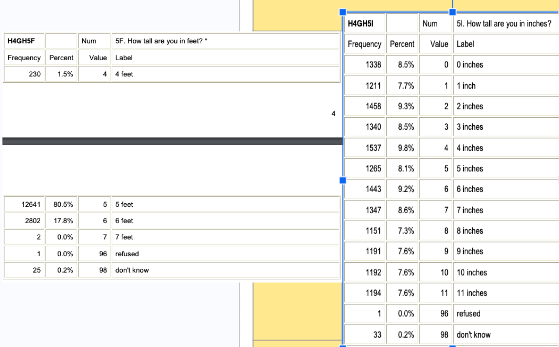

In [36]:
#Manage data for variable 1
df['H4GH5F'].value_counts()

5     4095
      1390
6      947
4       66
98       6
Name: H4GH5F, dtype: int64

In [38]:
df['Feet']= df['H4GH5F']
df['Feet']= pd.to_numeric(df['Feet'],errors= 'coerce')
df['Feet']= df['Feet'].loc[df['Feet'] < 96]
df['Feet']= df['Feet'].loc[df['Feet'] != ' ']
df['Feet'].value_counts()

5.0    4095
6.0     947
4.0      66
Name: Feet, dtype: int64

In [39]:
df['Inches']= df['H4GH5I']
df['Inches']= pd.to_numeric(df['Inches'],errors= 'coerce')
df['Inches']= df['Inches'].loc[df['Inches'] < 96]
df['Inches']= df['Inches'].loc[df['Inches'] != ' ']
df['Inches'].value_counts()

4.0     495
2.0     489
6.0     482
7.0     458
3.0     439
0.0     423
11.0    412
10.0    391
5.0     388
9.0     381
1.0     380
8.0     366
Name: Inches, dtype: int64

In [40]:
df['Height'] = df['Feet']*12 + df['Inches']
df['Height'].describe()

count    5104.000000
mean       67.457680
std         4.141833
min        48.000000
25%        64.000000
50%        67.000000
75%        71.000000
max        81.000000
Name: Height, dtype: float64

<Axes: xlabel='Height'>

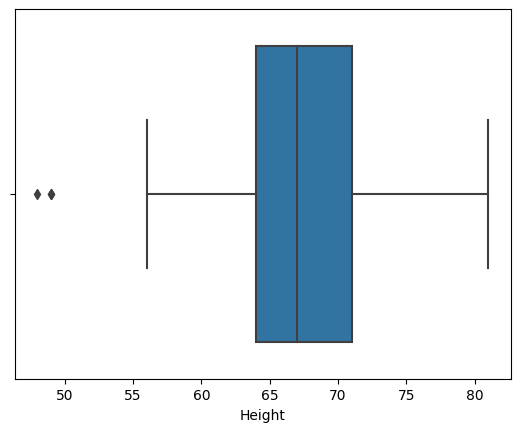

In [42]:
sns.boxplot(x = 'Height', data =df)

<Axes: xlabel='Height', ylabel='Percent'>

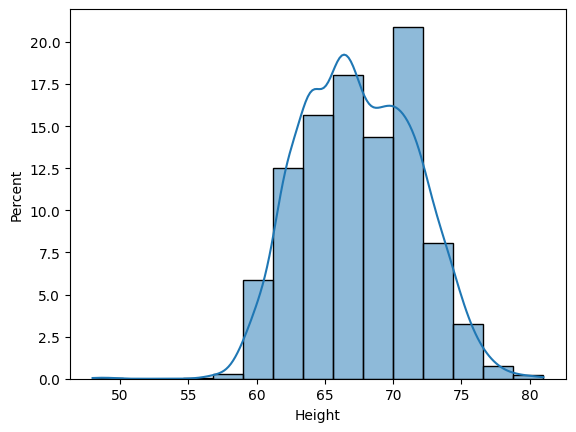

In [44]:
sns.histplot(x = 'Height', data =df, stat='percent', bins = 15,kde = True)

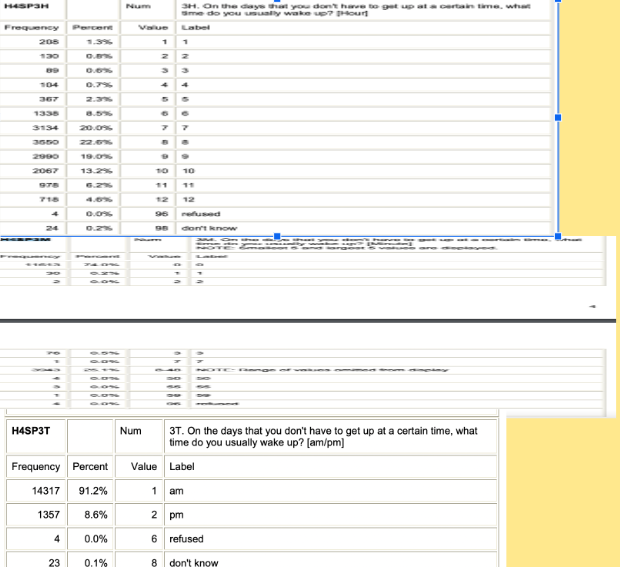

In [6]:
#Manage data for variable 1
df['H4SP3H'].value_counts()

      1390
8     1167
7     1035
9      934
10     674
6      425
11     316
12     238
5      130
1       73
4       45
2       39
3       30
98       7
96       1
Name: H4SP3H, dtype: int64

In [7]:
df['HOURS'] = df['H4SP3H']
df['HOURS']= pd.to_numeric(df['HOURS'],errors= 'coerce')
df['HOURS']= df['HOURS'].loc[df['HOURS'] < 96]
df['HOURS']= df['HOURS'].loc[df['HOURS'] != ' ']
df['HOURS'].value_counts()

8.0     1167
7.0     1035
9.0      934
10.0     674
6.0      425
11.0     316
12.0     238
5.0      130
1.0       73
4.0       45
2.0       39
3.0       30
Name: HOURS, dtype: int64

In [8]:
df['H4SP3M'].value_counts()

0     3777
      1390
30    1195
45      44
15      28
3       28
20      10
1        9
98       7
40       4
10       4
50       2
35       1
39       1
48       1
96       1
55       1
2        1
Name: H4SP3M, dtype: int64

In [9]:
df['MINS']= df['H4SP3M']
df['MINS']= pd.to_numeric(df['MINS'],errors= 'coerce')
df['MINS']= df['MINS'].loc[df['MINS'] < 96]
df['MINS']= df['MINS'].loc[df['MINS'] != ' ']
df['MINS'].value_counts()

0.0     3777
30.0    1195
45.0      44
15.0      28
3.0       28
20.0      10
1.0        9
40.0       4
10.0       4
50.0       2
55.0       1
48.0       1
39.0       1
35.0       1
2.0        1
Name: MINS, dtype: int64

In [10]:
df['H4SP3T'].value_counts()

1    4655
     1390
2     452
8       6
6       1
Name: H4SP3T, dtype: int64

In [11]:
df['AM_PM']=df['H4SP3T']
df['AM_PM'] = df['AM_PM'].loc[df['AM_PM'] !=' ']
df['AM_PM'] = df['AM_PM'].loc[df['AM_PM'] <'6']
df['AM_PM'].replace(['1','2'],['AM','PM'],inplace=True)
df['AM_PM'].value_counts()

AM    4655
PM     452
Name: AM_PM, dtype: int64

In [12]:
df_time_convert= df[['AM_PM','HOURS','MINS']]
#df_time_convert = df[['am_pm', 'hour', 'minutes']]

In [13]:
#Drops the missing values/cleans it 
df_time_convert.dropna(inplace=True)

<ipython-input-13-bd75b9aca4df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert.dropna(inplace=True)


In [14]:
df_time_convert

,AM_PM,HOURS,MINS
1,AM,7.0,30.0
3,AM,9.0,0.0
7,AM,6.0,30.0
9,PM,2.0,0.0
11,AM,5.0,0.0
...,...,...,...
6499,AM,10.0,0.0
6500,AM,8.0,0.0
6501,AM,5.0,30.0
6502,AM,8.0,2.0


In [15]:
def to_military_time_float(in_hour,in_min,am_pm):
  out_time = 0
  if in_hour == '12':

    if am_pm == 'AM': 
      out_time = 0
    else:
      out_time = int(in_hour)
  
  elif (0 < int(in_hour) < 12):
    if am_pm == 'AM':
      out_time = int(in_hour)
    else:
      out_time = int(in_hour) + 12
  
  

  out_min = int(in_min) / 60

  out_time += out_min 




  return out_time

In [16]:
to_military_time_float('9','30','AM')

9.5

In [17]:
#df_time_convert['Time Value (float)'] =  df_time_convert.apply(lambda x: to_military_time_float(x['hour'],x['minutes'],x['am_pm']),axis = 1)

In [18]:
df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['HOURS'],x['MINS'],x['AM_PM']),axis = 1)
#axis=1, to the column, apply the values 
df_time_convert

<ipython-input-18-582745c5d8a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['HOURS'],x['MINS'],x['AM_PM']),axis = 1)


,AM_PM,HOURS,MINS,Time Value (float)
1,AM,7.0,30.0,7.500000
3,AM,9.0,0.0,9.000000
7,AM,6.0,30.0,6.500000
9,PM,2.0,0.0,14.000000
11,AM,5.0,0.0,5.000000
...,...,...,...,...
6499,AM,10.0,0.0,10.000000
6500,AM,8.0,0.0,8.000000
6501,AM,5.0,30.0,5.500000
6502,AM,8.0,2.0,8.033333


In [19]:
df_time_convert.loc[df_time_convert['Time Value (float)'] > 24]

,AM_PM,HOURS,MINS,Time Value (float)


In [20]:
#df= df.assign(Name for the times = df_time_convert['Time Value (float)'])

In [30]:
df= df.assign(Get_up_time= df_time_convert['Time Value (float)'])

In [22]:
df

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7,HOURS,MINS,AM_PM,WAKE_UP
0,5710027,2,,,,,,,,,...,,,,,,,NaN,NaN,NaN,NaN
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,2,1,7.0,30.0,AM,7.500000
2,5710317,1,,,,,,,,,...,,,,,,,NaN,NaN,NaN,NaN
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,4,1,9.0,0.0,AM,9.000000
4,5710455,2,,,,,,,,,...,,,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,9971993,2,14.26027397,6,7,2008,2288373,373,2,V5.4,...,0,0,0,0,4,2,10.0,0.0,AM,10.000000
6500,9971993,1,,2,13,2008,2288343,343,1,V5.1,...,0,0,0,0,3,2,8.0,0.0,AM,8.000000
6501,9971997,1,15.09315068,3,22,2008,2288325,325,1,V5.2,...,1,0,0,0,4,3,5.0,30.0,AM,5.500000
6502,9971997,2,15.50958904,4,1,2008,2288325,325,2,V5.2,...,0,0,0,0,3,2,8.0,2.0,AM,8.033333


In [31]:
df['Get_up_time']

0             NaN
1        7.500000
2             NaN
3        9.000000
4             NaN
          ...    
6499    10.000000
6500     8.000000
6501     5.500000
6502     8.033333
6503     7.500000
Name: Get_up_time, Length: 6504, dtype: float64

In [34]:
df['Get_up_time'].max()

23.5

In [35]:
df['Get_up_time'].mean()

8.250365582974279

<Axes: xlabel='WAKE_UP'>

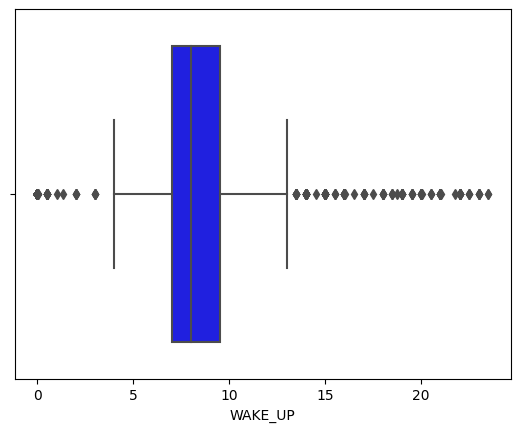

In [26]:
#Graphs and tables or statistics
sns.boxplot(x = 'Get_up_time', data =df, color ='blue')

<Axes: xlabel='Get_up_time', ylabel='Count'>

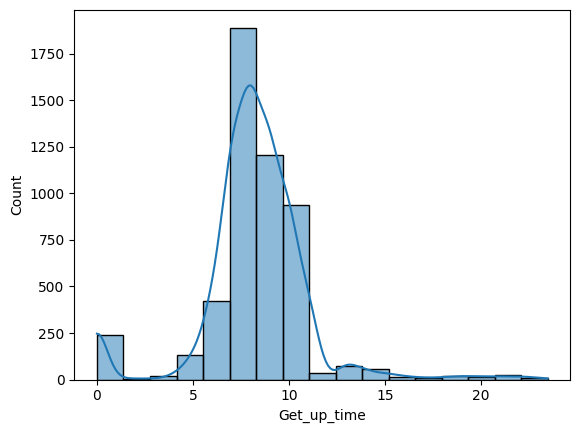

In [32]:
sns.histplot(x='Get_up_time',data=df,bins=17,kde=True)

<Axes: xlabel='Get_up_time', ylabel='Count'>

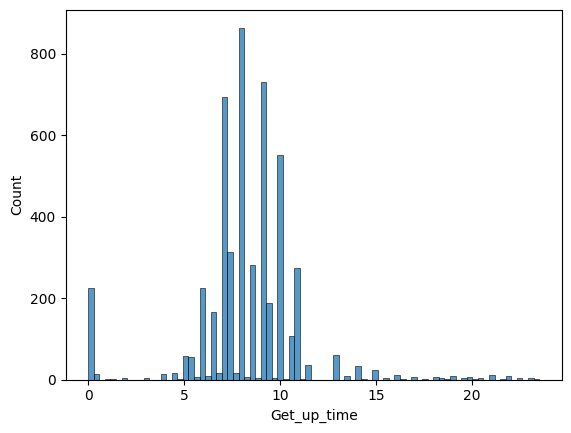

In [33]:
sns.histplot(x = 'Get_up_time', data =df)